# Predicción con Series de Tiempo

En este laboratorio se implementan 5 métodos diferentes para predecir con series de tiempo, utilizando 4 data sets distintos.\
- Fuente de consulta: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

In [1]:
# se cargan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [23]:
# se cargan los data sets
df_1 = pd.read_csv("daily-total-female-births.csv")

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [24]:
df_1.index = pd.to_datetime(df_1['Date'])
df_1.drop(columns='Date',inplace=True)
df_1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [25]:
df_1.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


#### Train and split

In [6]:
#train_test_split
buf = df_1.copy()
#train_test_split
tra = buf['Births'][:181].dropna()
tes = buf['Births'][182:].dropna()

C:\Users\DIANA\AppData\Local\Temp/ipykernel_10268/2341148388.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(buf.Births.dropna(),freq=182)


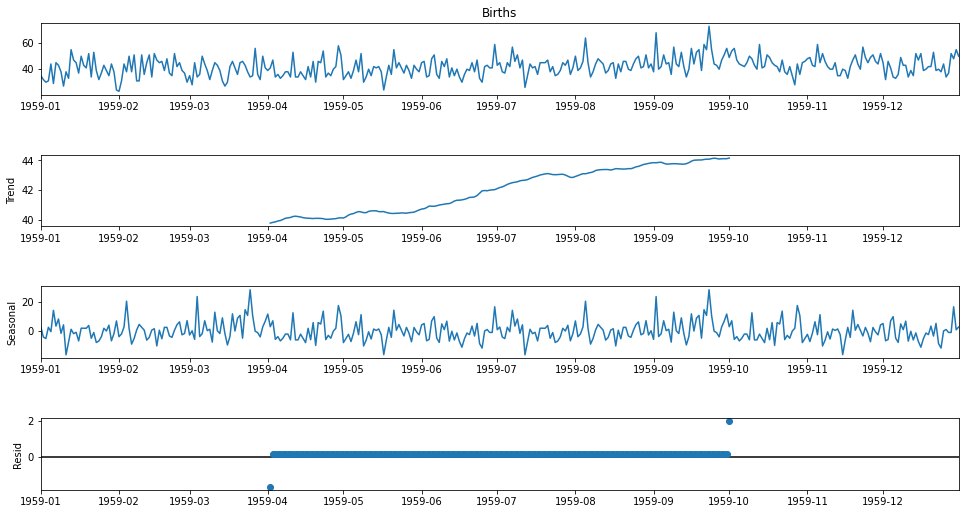

In [7]:
res = sm.tsa.seasonal_decompose(buf.Births.dropna(),freq=182)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

#### 1. Promedio

In [8]:
def prediccion_promedio(historia, config):
    n, tipo_prom = config
    if tipo_prom == "prom":
        return mean(historia[-n:])
    return median(historia[-n:])

#### 2. SARIMAX

In [11]:
sarimax = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),exog = tra,
                                enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarimax.summary()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Births   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1631.117
Date:                            Wed, 22 Sep 2021   AIC                          -3250.234
Time:                                    17:05:10   BIC                          -3232.012
Sample:                                01-01-1959   HQIC                         -3242.833
                                     - 06-30-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Births         1.0000   1.55e-09   6.43e+08      0.000       1.000       1.000
ar.L1         -0.1325      0.000   -375.668      0.000      -0.133      -0.132
ma.L1         -0.4247   3.45e-06  -1.23e+05      0.000      -0.425      -0.425
ar.S.L12      -0.5010      0.001   -385.208      0.000      -0.504      -0.498
ma.S.L12      -0.0978   1.04e-06  -9.42e+04      0.000      -0.098      -0.098
sigma2          1e-10   1.63e-10      0.614      0.539   -2.19e-10    4.19e-10
===================================================================================
Ljung-Box (L1) (Q):                  13.32   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.00   Prob(JB):                         0.27
Heteroskedasticity (H):               1.14   Skew:                            -0.04
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.42e+24. Standard errors may be unstable.
"""

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


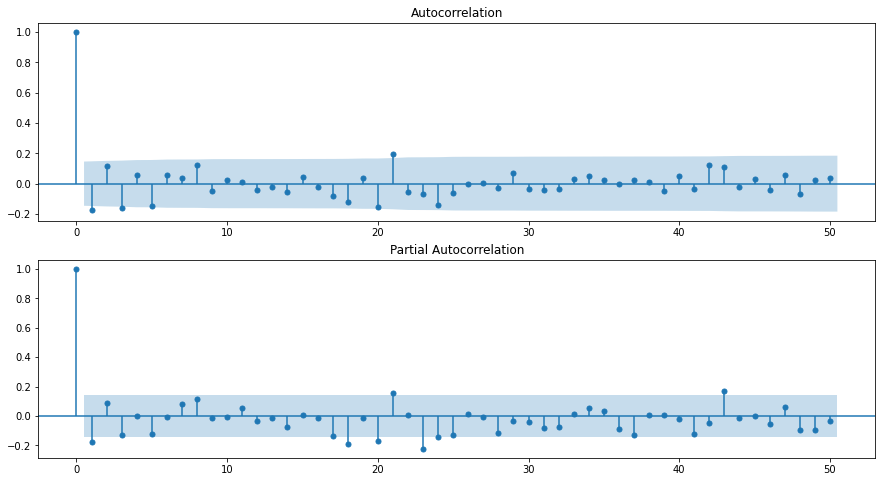

In [12]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False,freq='D').fit()
sarima.summary()
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [15]:
# Esto funcionaba? no me funciono 
# from sklearn.metrics import mean_squared_error
# pred = sarimax.predict('1959-06-31','1959-12-31',exog = tes)[1:]
# print('SARIMAX model MSE:{}'.format(mean_squared_error(tes, pred)))

In [13]:
# pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

NameError: name 'pred' is not defined

In [ ]:
# sarimax.plot_diagnostics(figsize=(15, 12))

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Date'>

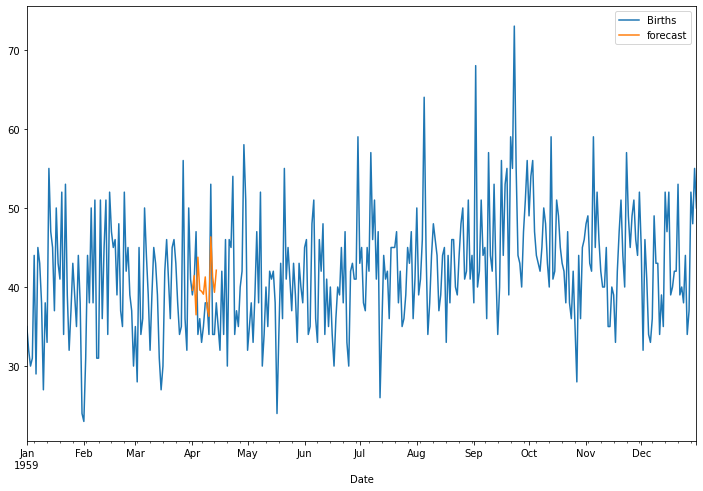

In [16]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_1['Births'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_1['forecast']=results.predict(start=90,end=103,dynamic=True)
df_1[['Births','forecast']].plot(figsize=(12,8))

In [17]:
from pandas.tseries.offsets import DateOffset
pred_date=[df_1.index[-1] + DateOffset(months=x)for x in range(0,24)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=df_1.columns)
pred_date

,Births,forecast
1960-01-31,NaN,NaN
1960-02-29,NaN,NaN
1960-03-31,NaN,NaN
1960-04-30,NaN,NaN
1960-05-31,NaN,NaN
1960-06-30,NaN,NaN
1960-07-31,NaN,NaN
1960-08-31,NaN,NaN
1960-09-30,NaN,NaN
1960-10-31,NaN,NaN


<AxesSubplot:>

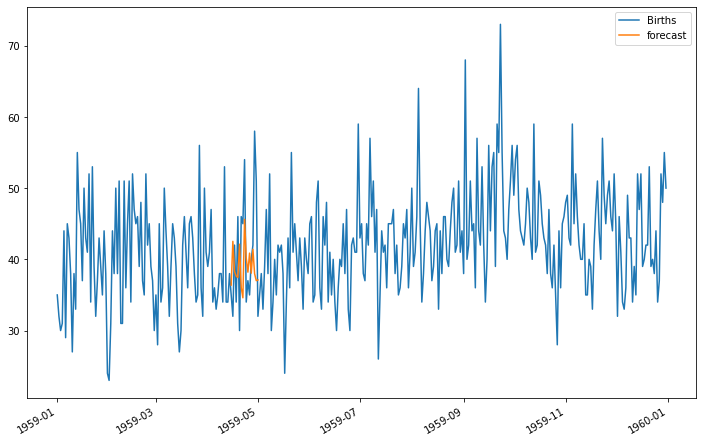

In [18]:
df_1=pd.concat([df_1,pred_date])
df_1['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
df_1[['Births', 'forecast']].plot(figsize=(12, 8))

#### 3. Winter-Holt

In [ ]:
# Fuente: https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

In [ ]:
def AlisamientoExponencial(historia, t, d, s, p, b, r):
    historia = array(historia)
    modelo = ExponentialSmoothing(historia, trend = t, damped = d,
                                  seasonal = s, seasonal_periods = p)
    modelo_ajustado = modelo.fit(optimized = True, use_boxcox = b, remove_bias = r)
    yhat = modelo_ajustado.predict(len(historia), len(historia))
    return yhat[0]

In [19]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Births Data'}, xlabel='Date'>

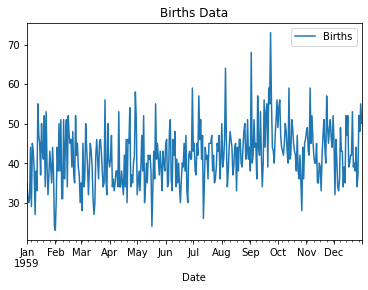

In [26]:
# plotting the original data
df_1[['Births']].plot(title='Births Data')

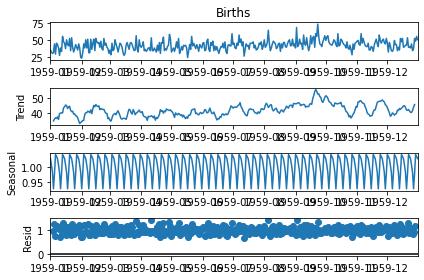

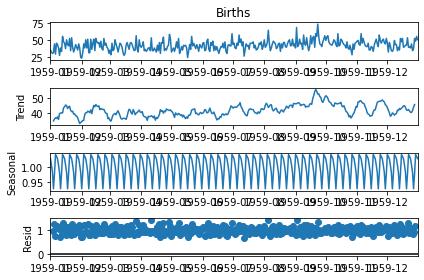

In [27]:
decompose_result = seasonal_decompose(df_1['Births'], model='multiplicative')
decompose_result.plot()

In [30]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df_1.index.Births = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2 * m)

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Date'>

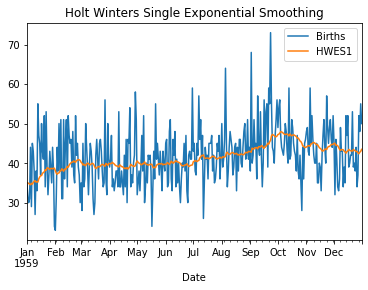

In [35]:
df_1['HWES1'] = SimpleExpSmoothing(df_1['Births']).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
df_1[['Births','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Date'>

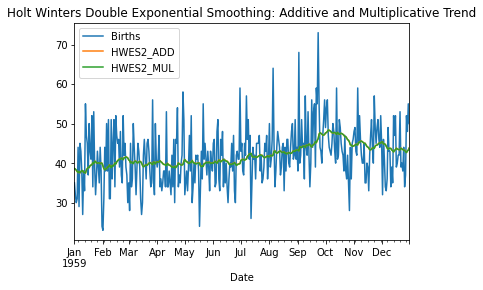

In [36]:
df_1['HWES2_ADD'] = ExponentialSmoothing(df_1['Births'],trend='add').fit().fittedvalues
df_1['HWES2_MUL'] = ExponentialSmoothing(df_1['Births'],trend='mul').fit().fittedvalues
df_1[['Births','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

In [ ]:
airline[‘HWES3_ADD’] = ExponentialSmoothing(airline[‘Thousands of Passengers’],trend=’add’,seasonal=’add’,seasonal_periods=12).fit().
fittedvalues
airline[‘HWES3_MUL’] = ExponentialSmoothing(airline[‘Thousands of Passengers’],trend=’mul’,seasonal=’mul’,seasonal_periods=12).fit().
fittedvalues
airline[[‘Thousands of Passengers’,’HWES3_ADD’,’HWES3_MUL’]].plot(title=’Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality’);

#### 4. Red Neuronal

In [ ]:
#Transformación de series
def series_a_supervisado(datos, n_entrada, n_salida = 1):
    df = DataFrame(datos)
    columnas = [ ]
    for i in range(n_entrada, 0, -1):
        columnas.append(df.shift(-1))
    for i in range(0, n_salida):
        columnas.appemd(df.shift(-1))
    agregado = concat(columnas, axis = 1)
    agregado.dropna(inplace = true)
    return agregado.values

#Predicción con Tensorflow y Keras
def prediccion_red_neuronal(historia, n_entrada, n_nodos, n_epocas, tamanio_tandas):
    datos = series_a_supervisado(historia, n_entrada)
    entreno_X, entreno_y = datos[:, :-1], datos[:, -1]
    modelo = Sequential()
    modelo.add(Dense(n_nodes, activation='relu', input_dim=n_entrada))
    modelo.add(layers.Dense(1))
    modelo.compile(loss = "mse", optimizer = "adam")
    modelo_ajustado = modelo.fit(entreno_X, entreno_y, epochs = n_epocas,
    batch_size = tamanio_tandas, verbose = 0)
    x_entrada = array(historia[-n_entrada:]).reshape(1, n_entrada)
    yhat = modelo.predict(x_entrada, verbose = 0)
    return yhat[0]

#### 5. FB Prophet

In [ ]:
from prophet import Prophet

In [ ]:
#Requiere de una pequeña transformación de los datos a usar
series = pd.read_csv("monthly-car-sales.csv", header = 0, index_col = None)
series["ds"] = pd.to_datetime(series["Month"])
series["y"] = series[["Sales"]].astype(float)
series = series[["ds", "y"]]
series.head( )

#Ejecución
modelo = Prophet(mcmc_samples = 500, seasonality_mode = "multiplicative")
modelo_ajustado = modelo.fit(series)
futuro = modelo_ajustado.make_future_dataframe(periods = 48, freq = "M")
prediccion = modelo_ajustado.predict(futuro)
prediccion[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail( )